# Sentiment analysis of tweet data using logistic regression

In [3]:
import nltk                                  # Python library for NLP
from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [7]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vaibhav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams.

In [6]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

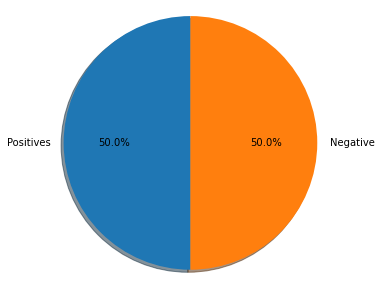

In [199]:
fig = plt.figure(figsize=(5, 5))

# labels for the two classes
labels = 'Positives', 'Negative'

# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Display the chart
plt.show()

In [8]:
# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


In [9]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [10]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [11]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

# Pre-processing of text data

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

The videos explained each of these steps and why they are important. Let's see how we can do these to a given tweet. We will choose just one and see how this is transformed by each preprocessing step.

### Remove hyperlinks,  Twitter marks and styles

Since we have a Twitter dataset, we'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. We'll use the "re" library to perform regular expression operations on our tweet. We'll define our search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

### Tokenizing

Tokenizing the string :- convert the sentence into list of word , for example :- "i am happy" this is the sentence and after tokenizing it will become ["i","am","happy"]

##### the code for this will be:-

tweet2 = "My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… "

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

#tokenize tweets

tweet_tokens = tokenizer.tokenize(tweet2)

###### [output]

Tokenized string:

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

### Lowercasing 

the data is not in one case some letter may in upper case so, convert all to lower case

### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.


##### code for this will be:

#stopword removal

tweet_tokens = ['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list

     if (word not in stopwords_english and  # remove stopwords
         word not in string.punctuation):  # remove punctuation
         tweets_clean.append(word)
         
         
###### output
removed stop words and punctuation:

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

### Stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.



##### code:-
#Instantiate stemming class

tweets_clean = ['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmer = PorterStemmer() 

#Create an empty list to store the stems

tweets_stem = [] 

for word in tweets_clean:

    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list
    

##### output
stemmed words:

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']

In [70]:
# buliding a function for pre-processing the text
def process_tweet(tweet):
    tweeter = []
    
    # remove old style retweet text "RT"
    tweet2 = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet2 = re.sub(r'#', '', tweet2)
    # instantiate tokenizer class
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(tweet2)
    
    #stopword removal
    tweets_clean = []

    for word in tweet_tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            tweets_clean.append(word)
    # Instantiate stemming class
    stemmer = PorterStemmer() 

    # Create an empty list to store the stems
    tweets_stem = [] 

    for word in tweets_clean:
        stem_word = stemmer.stem(word)  # stemming word
        tweets_stem.append(stem_word)  # append to the list
    return tweets_stem
        


        

In [75]:
twe = "My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i"
print(twe)
print("")
t = process_tweet(twe)
print("processed_tweet\n",t)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

processed_tweet
 ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


### build_freqs
This counts how often a word in the (the entire set of tweets) was associated with a positive label 1 or a negative label 0. It then builds the freqs dictionary, where each key is a (word,label) tuple, and the value is the count of its frequency within the corpus of tweets.

In [76]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

In [78]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

print(freqs)

{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3691, ('hey', 1.0): 77, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 99, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 643, ('listen', 1.0): 17, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 131, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 401, ('custom', 1.0): 4, ('wait', 1.0): 70, ('long',

In [86]:
for words in freqs:
    
    print(words[0])

followfriday
top
engag
member
commun
week
:)
hey
jame
odd
:/
pleas
call
contact
centr
02392441234
abl
assist
mani
thank
listen
last
night
bleed
amaz
track
scotland
congrat
yeaaah
yipppi
accnt
verifi
rqst
succeed
got
blue
tick
mark
fb
profil
15
day
one
irresist
flipkartfashionfriday
like
keep
love
custom
wait
long
hope
enjoy
happi
friday
lwwf
second
thought
’
enough
time
dd
new
short
enter
system
sheep
must
buy
jgh
go
bayan
:d
bye
act
mischiev
etl
layer
in-hous
wareh
app
katamari
well
…
name
impli
:p
influenc
big
...
juici
selfi
follow
u
back
perfect
alreadi
know
what'
great
opportun
junior
triathlet
age
12
13
gatorad
seri
get
entri
lay
greet
card
rang
print
today
job
:-)
friend'
lunch
yummm
nostalgia
tb
ku
id
conflict
help
here'
screenshot
work
hi
liv
hello
need
someth
fm
twitter
—
sure
thing
dm
x
i'v
heard
four
season
pretti
dope
penthous
obv
gobigorgohom
fun
y'all
yeah
suppos
lol
chat
bit
youth
💅🏽
💋
seen
year
rest
goe
quickli
bed
music
fix
dream
spiritu
ritual
festiv
népal
begin
line

stiffen
ricky_feb
grindea
courier
crypt
arma
record
gosh
limbo
orchard
art
super
karachi
ka
venic
sever
part
wit
accumul
maroon
cocktail
mididress
0-100
quick
1100d
auto-focu
manual
vein
crackl
glaze
layout
bomb
social
websit
pake
joim
feed
troop
mail
ladolcevitainluxembourg@hotmail.com
prrequest
journorequest
the_madstork
shaun
bot
chloe
actress
away
wick
hola
juan
houston
tx
jenni
year'
stumbl
upon
prob.nic
choker
btw
seouljin
photoset
sadomasochistsparadis
wynter
bottom
outtak
sadomasochist
paradis
ty
bbi
clip
lose
cypher
amen
x32
plant
allow
corner
addict
gurl
suck
owe
daniel
ape
saar
ahead
vers
butterfli
bonu
fill
tear
laughter
5so
yummmyyi
eat
dosa
easier
unless
achi
youuu
bawi
ako
queenesth
sharp
yess
poldi
cimbom
buddi
bruhhh
daddi
”
knowledg
attent
1tb
bank
credit
depart
anz
extrem
offshor
absolut
classic
gottolovebank
yup
in-shaa-allah
dua
thru
aameen
4/5
coca
cola
fanta
pepsi
sprite
all
sweeeti
;-)
welcometweet
psygustokita
setup
wet
feet
carpet
judgment
hypocrit
narcissist


drug
alcohol
apexi
crystal
meth
champagn
fc
streamer
juic
correct
portrait
izumi
fugiwara
clonmel
vibrant
estim
server
quiet
yey
insha'allah
wil
x21
trend
akshaymostlovedsuperstarev
indirect
askurban
lyka
mobilegam
io
nap
aff
unam
jonginuh
forecast
10am
5am
sooth
vii
sweetheart
freak
zayn
fucker
pet
illustr
wohoo
gleam
paint
deal
prime
minist
sunjam
industri
present
practic
proactiv
environ
unreal
zain
zac
isaac
oss
frank
iero
phase
david
beginn
shine
sunflow
tommarow
yall
rank
birthdaymonth
vianey
juli
birthdaygirl
town'
andrew
otwol
awhil
x20
all-tim
julia
robert
awwhh
bulldog
unfortun
02079
490
132
born
fightstickfriday
extravag
tearout
selekt
yoot
cross
gudday
dave
haileyhelp
eid
mubarak
brotheeerrr
adventur
tokyo
kansai
l
upp
om
60
minut
data
jesu
amsterdam
3rd
nextweek
booti
bcuz
step
option
stabl
sturdi
lukkke
again.ensoi
tc
madam
siddi
unknown
roomi
gn
gf
consent
mister
vine
peyton
nagato
yuki-chan
shoushitsu
archdbanterburi
experttradesmen
banter
quiz
tradetalk
floof
face
muah

oili
maricarljanah
navi
battlefield
6:15
degre
fahrenheit
🍸
╲
─
╱
🍤
╭
╮
┓
┳
┣
╰
╯
┗
┻
stool
toppl
findyourfit
prefer
whomosexu
stack
pandora
digitalexet
digitalmarket
sociamedia
nb
bom
dia
todo
forklift
warehous
worker
lsceen
immatur
gandhi
grassi
feetblog
infrar
daughter
4yr
old-porridg
fiend
2nite
comp
vike
t20blast
np
tax
ooohh
petjam
virtual
pounc
bentek
agn
socialmedia@dpdgroup.co.uk
sam
fruiti
vodka
sellyourcarin
5word
chaloniklo
pic.twitter.com/jxz2lbv6o
paperwhite'
laser-lik
focu
ghost
tagsforlikesapp
instagood
tbt
socket
spanner
😴
pglcsgo
x2
crave
slower
sjw
cakehamp
glow
yayyy
merced
hood
badg
host
drone
blow
ignor
retali
bolling
where'
denmark
whitey
cultur
course
intro
graphicdesign
videograph
space
ted'
bogu
1000
hahahaaah
owli
afternon
whangarei
kati
paulin
traffick
wors
henc
express
wot
hand-lett
roof
eas
2/2
sour
dough
egypt
hubbi
sakin
six
christma
avril
n04j
25
prosecco
pech
micro
catspj
4:15
lazyweekend
overdu
mice
💃
jurass
ding
nila
8)
cooki
shir
0
hale
cheshir
deco

gooodnight
iv
ri
jayci
karaok
ltsw
giant
1709
refus
collagen
2win
hopetowin
inventori
loveforfood
foodforthought
thoughtfortheday
carp
diem
nath
ning
although
harm
stormi
sync
devic
mess
nylon
gvb
cd
mountain.titl
unto
theworldwouldchang
categori
mah
panel
i'am
80-1
1708
neenkin
masterpiec
debit
beagl
♫
feat
charli
puth
wiz
khalifa
svu
darker
berni
henri
trap
tommi
vivian'
transpar
bitcoin
insight
ping
masquerad
zorroreturm
1707
pk
hay
jacquelin
passion
full-fledg
entrepreneur
workplac
venu
lago
luxord
potato
hundr
cite
academ
pokiri
1nenokkadin
heritag
wood
beleaf
spnfamili
spn
alwayskeepfight
jaredpadalecki
jensenackl
peasant
ahahha
distant
shout-out
adulthood
hopeless
tmr
:(
everyth
kid
section
ikea
cute
shame
i'm
nearli
19
2
month
heart
slide
wast
basket
“
hate
japanes
call
bani
”
dang
start
next
week
work
oh
god
babi
face
make
smile
neighbour
motor
ask
said
updat
search
sialan
athabasca
glacier
1948
:-(
jasper
jaspernationalpark
alberta
explorealberta
…
realli
good
g
idea
never
go

german
chart
situat
entri
even
top
100
pfft
place
white
wash
polaroid
newbethvideo
greec
xur
imi
fill
♡
♥
xoxoxo
pictur
stud
hund
6
kikchat
amazon
3.4
yach
telat
huvvft
zoo
fieldtrip
touch
yan
posit
king
futur
sizw
write
20
km
four
shift
aaahhh
boredom
en
aint
who
sins
that
somehow
tini
ball
barbel
owww
amsterdam
luv
💖
ps
looong
especi
:/
lap
litro
shepherd
lami
mayb
relax
lungomar
pesaro
giachietittiwed
igersoftheday
summertim
nose
bruis
lil
snake
journey
scarf
au
afford
fridayfeel
earli
money
chicken
woe
nigga
motn
make-up
justic
import
sit
mind
buy
limit
ver
normal
edit
huhuhu
stack
m'ladi
j8
j11
m20
jk
acad
schedul
nowww
cop
jame
window
hugh
paw
muddi
distract
heyi
otherwis
picnic
24
cupcak
talaga
best
femal
poppin
joc
playin
saw
fix
coldplay
media
player
fail
subj
sobrang
bv
zamn
line
afropunk
fest
brooklyn
id
put
50
madrid
shithous
cutest
danc
ur
arm
rais
hand
ladder
told
climb
success
nerv
wrack
test
booset
restart
assassin
creed
ii
heap
fell
daughter
begin
ps3
ankl
step
puddl
w

lah
magic
menil
340
kam'
meee
diz
biooo
ay
taray
yumu-youtub
339
parijat
willmissyouparijat
abroad
jolli
scotland
338
mcnugget
sophi
feedback
met
caramello
koala
bar
suckmejimin
337
sucki
laughter
pou
goddamn
bark
nje
blast
hun
dbn
🎀
336
hardest
335
pledg
realiz
viber
mwah
estat
crush
lansi
334
hp
waah
miami
vandag
kgola
neng
eintlik
porn
4like
repost
333
magpi
22.05
15-24
05.15
coach
ador
chswiyfxcskcalum
nvm
lemm
quiet
foof
332
casilla
manchest
xi
rmtour
heavi
irl
blooper
huhuhuhu
na-tak
sorta
unfriend
greysonch
sandwich
bell
sebastian
rewatch
s4
ser
past
heart-break
outdat
m4
abandon
theater
smh
7-3
7.30-
ekk
giriboy
harriet
gegu
gray
truth
tbt
331
roof
indian
polit
blame
68
repres
corbyn
labour'
fortun
rant
icecream
cuti
ry
lfccw
5ever
america
ontheroadagain
halaaang
reciev
flip
flop
caesarspalac
socialreward
requir
cali
fuckboy
330
deliveri
chrompet
easili
immun
system
lush
bathtub
php
mysql
libmysqlclient-dev
dev
pleasanton
wala
329
quickli
megan
heed
328
gwss
thankyouu
charad
be

invit
donna
thurston
collin
quietli
kennel
911
pluckersss
gion
886
nsfw
kidschoiceaward
ming
pbr
shoutout
periscop
ut
shawti
naw
sterling'
9muse
hrryok
asap
wnt
9:30
9:48
9/11
bueno
receptionist
ella
goe
ketchup
tasteless
deantd
justgotkanekifi
notgonnabeactivefor
2weeksdontmissittoomuch
2013
disney
vlog
swim
turtl
cnn
straplin
theatr
guncontrol
stung
tweak
thát'
powerpoint
present
diner
no-no
hind
circuit
secondari
sodder
perhap
mobitel
colin
playstat
charg
exp
misspelt
wan
hyungwon
alarm
needicecreamnow
shake
repeatedli
nu-uh
jace
mostest
vip
urgh
consol
grigson'
carrot
>:-(
sunburn
ughh
enabl
otter
protect
argh
pon
otl
sleepov
jess
bebe
fabina
barrista'
plant
pup
brolli
mere
nhi
dey
serv
kepo
bitin
pretzel
bb17
bblf
fuckin
vanilla
latt
skulker
thread
pg279q
hungrrryyi
icloud
ipod
hallyu
buuut
über
oki
8p
champagn
harlo
torrentialrain
lloyd
asshol
clearli
knowww
runni
sehun
sweater
intoler
xenophob
wtfff
tone
wasnt
1pm
fantasi
newer
pish
comparison
remast
fe14
icon
strawberri
loos
ka

###  Extracting the Features

* Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
    * The first feature is the number of positive words in a tweet.
    * The second feature is the number of negative words in a tweet. 

In [169]:
def extract_features(tweet, freqs, process_tweet=process_tweet):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    
    
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        
        x[0,2] += freqs.get((word, 0.0),0)
        
   
    assert(x.shape == (1, 3))
    return x

In [170]:
import pandas as pd
tw = []
for tweet in tweets:
    t = extract_features(tweet, freqs)
    for u in t:
        tw.append(u)
    

In [171]:
# creating a dataframe 
data = pd.DataFrame(tw,columns = ["bias","postive freq.","negative freq"])
df = pd.concat([data,pd.DataFrame(labels,columns = ["labels"])],axis = 1)

In [172]:
df

,bias,postive freq.,negative freq,labels
0,1.0,3887.0,72.0,1.0
1,1.0,4613.0,518.0,1.0
2,1.0,3883.0,161.0,1.0
3,1.0,3712.0,4.0,1.0
4,1.0,4038.0,281.0,1.0
...,...,...,...,...
9995,1.0,56.0,4711.0,0.0
9996,1.0,3.0,4601.0,0.0
9997,1.0,34.0,4653.0,0.0
9998,1.0,10.0,4598.0,0.0


In [173]:
#independent data
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

Text(0, 0.5, 'Negative')

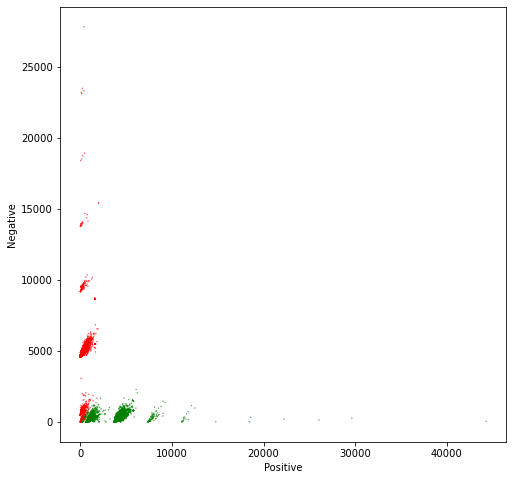

In [203]:
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green']

# Color based on the sentiment Y
ax.scatter(x[:,1], x[:,2], c=[colors[int(k)] for k in y], s = 0.1)  # Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

In [187]:
# splitting the dataset to train and test
# in ratio 75 / 25
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25 , random_state = 1)

In [188]:
x_train

array([[1.000e+00, 1.824e+03, 4.420e+02],
       [1.000e+00, 6.900e+01, 4.663e+03],
       [1.000e+00, 2.950e+02, 4.920e+03],
       ...,
       [1.000e+00, 3.797e+03, 1.030e+02],
       [1.000e+00, 1.000e+00, 4.595e+03],
       [1.000e+00, 3.700e+03, 1.000e+01]])

In [189]:
# Hence once the age and salary come on one scale, Now train the model
#in exam this code with training spliting data till fit
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 1)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [190]:
# After training the model, it's time to test our test data to predict
y_pred = classifier.predict(x_test)
y_pred

array([0., 1., 1., ..., 1., 1., 0.])

In [191]:
# let's check the accuracy , precision and recall
import sklearn.metrics as metrics
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
print("precision: ",metrics.precision_score(y_test,y_pred))
print("Recall: ",metrics.recall_score(y_test,y_pred))

Accuracy:  0.9932
precision:  0.9883177570093458
Recall:  0.998426435877262


In [198]:
# testing the model
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 
              'great', 'great great', 'great great great', 'great great great great',
              'I am happy because i am learning NLP',
              'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!']:
    extract_tweet = extract_features(tweet, freqs)
    y_pred = classifier.predict(extract_tweet)
    if y_pred == 1.0:
        print(tweet," --> tweet is +ve")
    else:
        print(tweet,"--> tweet is -ve")
    

I am happy  --> tweet is +ve
I am bad --> tweet is -ve
this movie should have been great.  --> tweet is +ve
great  --> tweet is +ve
great great  --> tweet is +ve
great great great  --> tweet is +ve
great great great great  --> tweet is +ve
I am happy because i am learning NLP  --> tweet is +ve
This is a ridiculously bright movie. The plot was terrible and I was sad until the ending! --> tweet is -ve
